# Titanic Survival 

Build decision tree model to predict survival based on certain parameters

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

In this file using following columns build a model to predict if person would survive or not,

Pclass,
Sex,
Age,
Fare,

Calculate score of your model

Solved using-> Logistic Regression and Decision Tree 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data 

df=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//titanic.csv",header=0)

df.columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

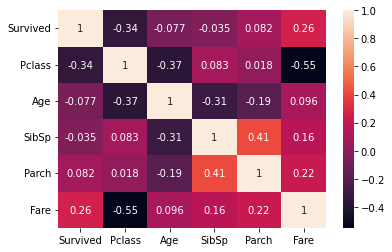

In [3]:
# Correlation 
import seaborn as sn

corr_df=df.drop(['Name','PassengerId','Ticket','Cabin'],axis='columns')

sn.heatmap(corr_df.corr(),annot=True)

In [4]:
y=df.Survived
df.drop(['Survived'],axis='columns',inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
np.unique(df.Embarked)

TypeError: '<' not supported between instances of 'float' and 'str'

In [5]:
# get dummies 
dummies=pd.get_dummies(data=df,columns=['Pclass','Sex','Embarked','Parch','SibSp'])


dummies.columns

Index(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

In [6]:

#drop not needed columns
dummies=dummies.drop(['Name','PassengerId','Ticket','Cabin'],axis='columns')
dummies



,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,22.0,7.2500,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
887,19.0,30.0000,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
888,NaN,23.4500,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
889,26.0,30.0000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
# to get final X (drop one dummay var from each to escape dummy trap)
X=dummies.drop(['Pclass_3','Sex_male','Embarked_S','Parch_6','SibSp_8'],axis='columns')
X

# fill NaN age values by mean
mean_age=X.Age.mean()
mean_age

# fillna
X_new=X.fillna({'Age':mean_age})
X_new


,Age,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5
0,22.000000,7.2500,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,38.000000,71.2833,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,26.000000,7.9250,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,35.000000,53.1000,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,35.000000,8.0500,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
887,19.000000,30.0000,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
888,29.699118,23.4500,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
889,26.000000,30.0000,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_sc=sc.fit_transform(X_new)

X_sc=pd.DataFrame(X_sc)
X_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.592481,-0.502445,-0.565685,-0.510152,-0.737695,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122
1,0.638789,0.786845,1.767767,-0.510152,1.355574,2.074505,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122
2,-0.284663,-0.488854,-0.565685,-0.510152,1.355574,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122
3,0.407926,0.420730,1.767767,-0.510152,1.355574,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122
4,0.407926,-0.486337,-0.565685,-0.510152,-0.737695,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,-0.565685,1.960202,-0.737695,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122
887,-0.823344,-0.044381,1.767767,-0.510152,1.355574,-0.482043,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122
888,0.000000,-0.176263,-0.565685,-0.510152,1.355574,-0.482043,-0.307562,-1.784124,-0.390707,3.183944,-0.075122,-0.067153,-0.075122,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122
889,-0.284663,-0.044381,1.767767,-0.510152,-0.737695,2.074505,-0.307562,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122


In [9]:
# split data
from sklearn.model_selection import train_test_split

# test data is 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2,random_state=1)

np.shape(X_train)

(712, 19)

# Decision Tree Algorithm

In [70]:
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()

#train model
model_dt.fit(X_train,y_train)

# predict
y_pred_dt=model_dt.predict(X_test)

#score
acc_dt=model_dt.score(X_test,y_test)
print(f"The score of the Decision Tree model is: {round(acc_dt*100,2)}%")

The score of the Decision Tree model is: 76.54%


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       106
           1       0.74      0.66      0.70        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



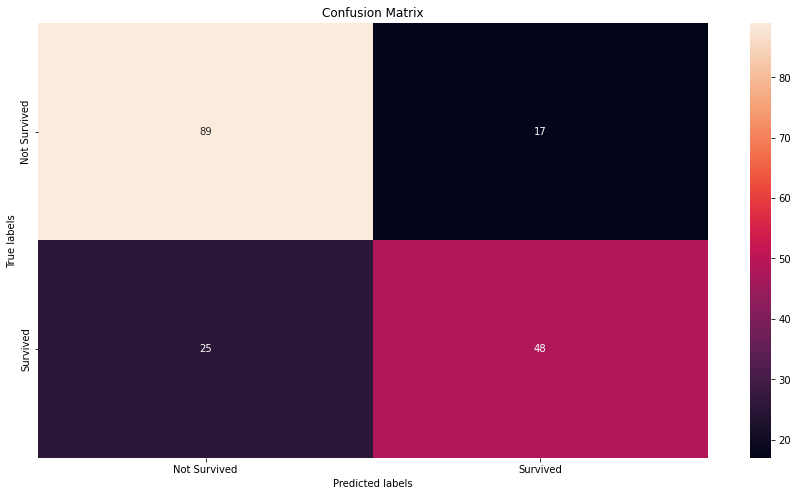

In [16]:
# Eval metrics
from sklearn.metrics import confusion_matrix, classification_report

cm_dt=confusion_matrix(y_test,y_pred_dt)
cm_dt

# classifc rep
print(classification_report(y_test,y_pred_dt))

# heatmap
import seaborn as sn

plt.figure(figsize=(15,8))
ax= plt.subplot()

sn.heatmap(cm_dt,annot=True,fmt='g',ax=ax)

# labels
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived']);

# UNSUPERVISED ML: K MEANS CLUSTERING

In [20]:
# KMeans Clustering

from sklearn.cluster import KMeans

km=KMeans(n_clusters=2)

# fit 
km.fit(X_new)

# predict
y_pred_km=km.predict(X_new)
y_pred_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[2349744.80463753, 998585.736524398, 546991.7576517997, 343378.62838225556, 252711.18492418027, 188256.93553696782, 143123.37159201386, 120117.33760436946, 104221.75260283572, 93370.67138397424]


Text(0.5, 1.0, 'Elbow Plot')

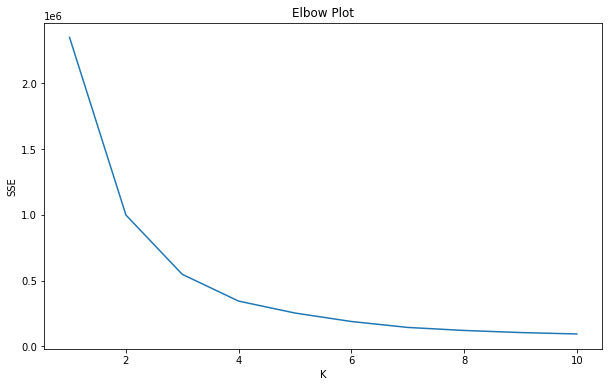

In [10]:
# Elbow technique ( to get best k value)

sse=[]
k=range(1,11)
for i in range(1,11):
    km_t=KMeans(n_clusters=i)  # k value
    km_t.fit(X_new)
    sse_temp=km_t.inertia_
    sse.append(sse_temp)

print(sse)

# plot elbow 
plt.figure(figsize=(10,6))
plt.plot(k,sse)
plt.xlabel('K');plt.ylabel('SSE');plt.title('Elbow Plot')

# Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()

# train
model_nb.fit(X_train,y_train)

#score
acc_nb=model_nb.score(X_test,y_test)
print("The score of the Naive Bayes model is:",round(acc_nb*100,2),"%")

# prediction
y_pred_nb=model_nb.predict(X_test)

# prob
model_nb.predict_proba(X_test)

# confusion martrix
from sklearn.metrics import confusion_matrix

cm_nb=confusion_matrix(y_test,y_pred_nb)
print(cm_nb)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

# train model
model_lr.fit(X_train,y_train)

# prediction 
y_pred_lr=model_lr.predict(X_test)

# score
acc_lr=model_lr.score(X_test,y_test)
print("The score of the LR model is:",round(acc_lr*100,2),"%")

# y_pred
y_pred_lr

The score of the LR model is: 77.65 %


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=400)

# train model
model_rf.fit(X_train,y_train)

# prediction
y_pred_rf=model_rf.predict(X_test)

# score
acc_rf=model_rf.score(X_test,y_test)
print(f"The score of the Random Forest Classifier is: {round(acc_rf*100,2)}%")

The score of the Random Forest Classifier is: 76.54%


In [19]:
# SVM model

from sklearn.svm import SVC

model_svm=SVC(C=10,gamma=1,kernel='rbf')

# train model
model_svm.fit(X_train,y_train)

# predict
y_pred_svm=model_svm.predict(X_test)

#accuracy 
acc_svm=model_svm.score(X_test,y_test)
print(f"The score of the SVM Classifier is: {round(acc_svm*100,2)}%")

The score of the SVM Classifier is: 74.86%


# Using Hyper-parameter Tuning using GridSearchCV for SVM

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = GridSearchCV(svm.SVC(gamma='auto'), { 'C': [1,10,20],'kernel': ['rbf','linear']}, cv=5, return_train_score=False)

clf.fit(X_train,y_train)

clf.cv_results_

{'mean_fit_time': array([1.86006069e-02, 7.01962409e+00, 2.48014450e-02, 2.25165870e+01,
        3.18015575e-02, 3.16399692e+01]),
 'std_fit_time': array([4.88833645e-04, 4.20100686e+00, 1.46993139e-03, 7.64472722e+00,
        3.06103227e-03, 1.55313220e+01]),
 'mean_score_time': array([0.00900054, 0.0030004 , 0.00860085, 0.00320058, 0.01100073,
        0.0032002 ]),
 'std_score_time': array([5.00111031e-07, 1.15430054e-06, 4.90388166e-04, 9.80143649e-04,
        3.34652631e-03, 3.99041386e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'li

In [19]:
acc_gs=clf.best_score_
print(f"The score of the SVM GridSearchCV Classifier is: {round(acc_gs*100,2)}%")

The score of the SVM GridSearchCV Classifier is: 79.79%


# ANN (MLP for Binary Classification)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [22]:
# classfier
clfr=Sequential()

# input and first hidden layer
clfr.add(Dense(units=8,kernel_initializer='he_normal',activation='relu',input_dim=19))

# output layer
clfr.add(Dense(units=1,kernel_initializer='glorot_normal',activation='sigmoid'))

# compile model
clfr.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=clfr.fit(X_train, y_train,validation_split=0.33, batch_size =32, epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 23ms/step - loss: 0.9973 - accuracy: 0.4025 - val_loss: 1.0190 - val_accuracy: 0.4085
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.9429 - accuracy: 0.4340 - val_loss: 0.9629 - val_accuracy: 0.5021
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8952 - accuracy: 0.5010 - val_loss: 0.9165 - val_accuracy: 0.5149
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8566 - accuracy: 0.5094 - val_loss: 0.8767 - val_accuracy: 0.5064
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8228 - accuracy: 0.5136 - val_loss: 0.8431 - val_accuracy: 0.5106
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7934 - accuracy: 0.5220 - val_loss: 0.8138 - val_accuracy: 0.5362
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7688 - accuracy: 0.5367 - val_loss: 0.7873 - val_accuracy: 0.5532
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.7925 - val_loss: 0.4682 - val_accuracy: 0.7830
Epoch 60/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4474 - accuracy: 0.7925 - val_loss: 0.4667 - val_accuracy: 0.7830
Epoch 61/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4459 - accuracy: 0.7904 - val_loss: 0.4656 - val_accuracy: 0.7830
Epoch 62/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4447 - accuracy: 0.7925 - val_loss: 0.4645 - val_accuracy: 0.7787
Epoch 63/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4432 - accuracy: 0.8050 - val_loss: 0.4645 - val_accuracy: 0.7915
Epoch 64/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4419 - accuracy: 0.8071 - val_loss: 0.4634 - val_accuracy: 0.7872
Epoch 65/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.8071 - val_loss: 0.4626 - val_accuracy: 0.7872
Epoch 

In [36]:
y_pred_ann=clfr.predict(X_test)

6/6 [==============================] - 0s 1ms/step


array([[0.7743948 ],
       [0.08819285],
       [0.82941365],
       [0.6291727 ],
       [0.98023206],
       [0.11756217],
       [0.21513085],
       [0.9099373 ],
       [0.51575446],
       [0.5418568 ],
       [0.10316118],
       [0.56938374],
       [0.25974968],
       [0.21001326],
       [0.62771076],
       [0.3781675 ],
       [0.01122241],
       [0.0777765 ],
       [0.07120644],
       [0.5371527 ],
       [0.08163806],
       [0.11254784],
       [0.96544415],
       [0.49079493],
       [0.70064753],
       [0.09761935],
       [0.941287  ],
       [0.66814035],
       [0.22639024],
       [0.9296857 ],
       [0.6150884 ],
       [0.37844035],
       [0.17709494],
       [0.45919043],
       [0.0867245 ],
       [0.72431874],
       [0.3107438 ],
       [0.08743774],
       [0.5669097 ],
       [0.12144281],
       [0.56031823],
       [0.5904052 ],
       [0.75448895],
       [0.24763107],
       [0.9543292 ],
       [0.0727573 ],
       [0.01754023],
       [0.158

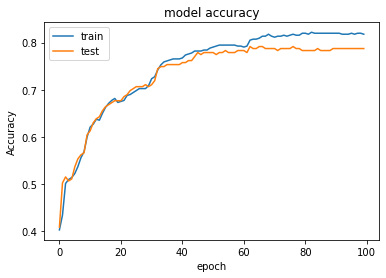

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

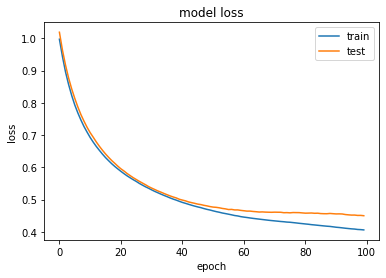

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [25]:
# ANN model performance on test data 

clfr.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7821


[0.47039327025413513, 0.7821229100227356]

In [44]:
# Save the model
from keras.models import load_model

clfr.save("titanic.h5")


In [122]:
# Prediction for Kaggle test dataset

test=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//Kaggle//test_titanic.csv",header=0)

test1=test.fillna({'Age':test.Age.mean()})

test1

# get dummies 
dummies1=pd.get_dummies(data=test1,columns=['Pclass','Sex','Embarked','Parch','SibSp'])
dummies1.columns

Index(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

In [123]:
# drop not needed
dummies1=dummies1.drop(['Name','PassengerId','Ticket','Cabin'],axis='columns')
dummies1



,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.50000,7.8292,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,47.00000,7.0000,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,62.00000,9.6875,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,27.00000,8.6625,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,22.00000,12.2875,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
414,39.00000,108.9000,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
415,38.50000,7.2500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
416,30.27259,8.0500,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [124]:
test_kaggle=dummies1.drop(['Pclass_3','Sex_male','Embarked_S','Parch_6','SibSp_8'],axis='columns')


# SCALE THE DATA
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_kaggle_test=sc.fit_transform(test_kaggle)

X_kaggle_test=pd.DataFrame(X_kaggle_test)
X_kaggle_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.334993,-0.497811,-0.586559,-0.534933,-0.755929,-0.568142,2.843757,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
1,1.325530,-0.512660,-0.586559,-0.534933,1.322876,-0.568142,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,-1.447859,1.673320,-0.186154,-0.098295,-0.098295,-0.04897
2,2.514175,-0.464532,-0.586559,1.869391,-0.755929,-0.568142,2.843757,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
3,-0.259330,-0.482888,-0.586559,-0.534933,-0.755929,-0.568142,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
4,-0.655545,-0.417971,-0.586559,-0.534933,1.322876,-0.568142,-0.351647,-1.882413,2.65301,-0.29277,-0.085023,-0.069338,-0.04897,-1.447859,1.673320,-0.186154,-0.098295,-0.098295,-0.04897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.493856,-0.586559,-0.534933,-0.755929,-0.568142,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
414,0.691586,1.312180,1.704858,-0.534933,1.322876,1.760125,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
415,0.651965,-0.508183,-0.586559,-0.534933,-0.755929,-0.568142,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897
416,0.000000,-0.493856,-0.586559,-0.534933,-0.755929,-0.568142,-0.351647,0.531233,-0.37693,-0.29277,-0.085023,-0.069338,-0.04897,0.690675,-0.597614,-0.186154,-0.098295,-0.098295,-0.04897


In [105]:
np.unique(test1.Embarked)

array(['C', 'Q', 'S'], dtype=object)

In [139]:
# load saved model ANN

model_ann=load_model('titanic.h5')

y_pred_prob=model_ann.predict(X_kaggle_test)


14/14 [==============================] - 0s 1ms/step


In [141]:

y_pred_ann=[]
for element in y_pred_prob:
    if element > 0.5:
       y_pred_ann.append(1)
    else:
       y_pred_ann.append(0)

In [142]:
test_sol=pd.DataFrame(y_pred_ann)

test_sol.to_csv('titanic_pred_kaggle.csv')